In [1]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline


In [2]:
data = pd.read_csv(os.getcwd()+'/planets.csv')  #Import Exoplanet data
#https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=compositepars

In [3]:
#taking a look at dataframe characteristics

In [4]:
data.shape     

(4009, 60)

In [5]:
data.columns

Index(['rowid', 'fpl_hostname', 'fpl_letter', 'fpl_name', 'fpl_discmethod',
       'fpl_controvflag', 'fpl_disc', 'fpl_orbper', 'fpl_orbperreflink',
       'fpl_smax', 'fpl_smaxreflink', 'fpl_eccen', 'fpl_eccenreflink',
       'fpl_bmasse', 'fpl_bmassj', 'fpl_bmassprov', 'fpl_bmassreflink',
       'fpl_rade', 'fpl_radj', 'fpl_rads', 'fpl_radreflink', 'fpl_dens',
       'fpl_densreflink', 'fpl_eqt', 'fpl_eqtreflink', 'fpl_insol',
       'fpl_insolreflink', 'fpl_tranflag', 'fpl_cbflag', 'fpl_snum', 'ra_str',
       'ra', 'dec_str', 'dec', 'fst_posreflink', 'fst_dist', 'fst_distreflink',
       'fst_optmag', 'fst_optmagband', 'fst_optmagreflink', 'fst_nirmag',
       'fst_nirmagband', 'fst_nirmagreflink', 'fst_spt', 'fst_sptreflink',
       'fst_teff', 'fst_teffreflink', 'fst_logg', 'fst_loggreflink', 'fst_lum',
       'fst_lumreflink', 'fst_mass', 'fst_massreflink', 'fst_rad',
       'fst_radreflink', 'fst_met', 'fst_metratio', 'fst_metreflink',
       'fst_age', 'fst_agereflink'],
     

In [6]:
data.head(1)

,rowid,fpl_hostname,fpl_letter,fpl_name,fpl_discmethod,fpl_controvflag,fpl_disc,fpl_orbper,fpl_orbperreflink,fpl_smax,...,fst_lumreflink,fst_mass,fst_massreflink,fst_rad,fst_radreflink,fst_met,fst_metratio,fst_metreflink,fst_age,fst_agereflink
0,1,11 Com,b,11 Com b,Radial Velocity,0,2007,326.03,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,1.29,...,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,2.7,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,19.0,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,-0.35,[Fe/H],<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,NaN,NaN


In [7]:
#Grabbing relevant columns, renaming, creating derived columns.

In [8]:
df = pd.DataFrame()
df['Planet'] = data['fpl_name']
df['Method'] = data['fpl_discmethod']
df['Year'] = data['fpl_disc']
df['Days/Year'] = data['fpl_orbper']
df['EarthMass'] = data['fpl_bmasse']
df['Volume'] = (4/3)*3.1415926*(data['fpl_rade']**3)
df['Density'] = data['fpl_dens']
df['Temperature(C)'] = data['fpl_eqt'] - 273.15
df['Gravity'] = (6.7*(10**-11))*(((data['fpl_bmasse']*(5.972*(10**24)))/((data['fpl_rade']*(6.371*(10**6)))**2)))
df['Stars'] = data['fpl_snum']
df['Distance(Ly)'] = data['fst_dist']*3.26156
df['SpectralType'] = data['fst_spt']
df['StellarMass'] = data['fst_mass']
df['StellarVolume'] = (4/3)*3.1415926*(data['fst_rad']**3)
df['StellarAgeB'] = data['fst_age']

In [9]:
df.shape

(4009, 15)

In [10]:
df.head(5)

,Planet,Method,Year,Days/Year,EarthMass,Volume,Density,Temperature(C),Gravity,Stars,Distance(Ly),SpectralType,StellarMass,StellarVolume,StellarAgeB
0,11 Com b,Radial Velocity,2007,326.03000,6165.6000,7420.697237,19.10,NaN,415.129883,1,304.531857,K0 III,2.70,28730.911525,NaN
1,11 UMi b,Radial Velocity,2009,516.21997,4684.8142,7794.781329,13.80,NaN,305.254124,1,410.043323,K4 III,2.78,110738.876110,1.56
2,14 And b,Radial Velocity,2008,185.84000,1525.5000,8992.029703,3.90,NaN,90.367482,1,246.541320,G8 III,2.20,5575.279667,4.50
3,14 Her b,Radial Velocity,2002,1773.40002,1481.0878,8992.029703,3.79,NaN,87.736595,1,58.512386,K0 V,0.90,3.369283,5.24
4,16 Cyg B b,Radial Velocity,1996,798.50000,565.7374,10305.994524,1.26,NaN,30.600375,3,68.981994,G2.5 V,1.08,6.043993,7.40


In [11]:
df.dtypes

Planet             object
Method             object
Year                int64
Days/Year         float64
EarthMass         float64
Volume            float64
Density           float64
Temperature(C)    float64
Gravity           float64
Stars               int64
Distance(Ly)      float64
SpectralType       object
StellarMass       float64
StellarVolume     float64
StellarAgeB       float64
dtype: object

In [12]:
df.describe()

,Year,Days/Year,EarthMass,Volume,Density,Temperature(C),Gravity,Stars,Distance(Ly),StellarMass,StellarVolume,StellarAgeB
count,4009.000000,3.906000e+03,3985.000000,3.995000e+03,3911.000000,863.000000,3977.000000,4009.000000,4003.000000,3998.000000,3.895000e+03,3376.000000
mean,2014.164630,2.332226e+03,478.862385,3.834299e+03,4.381854,818.764253,52.992493,1.037416,2058.801819,0.995683,2.681133e+03,4.256310
std,3.694866,1.171786e+05,4346.100513,3.157568e+04,23.943223,580.978678,369.292802,0.215648,2602.922278,0.594089,4.785856e+04,2.214306
min,1989.000000,9.070629e-02,0.020000,1.588936e-01,0.030000,-223.150000,0.375443,1.000000,4.240028,0.010000,4.188790e-06,0.001000
25%,2014.000000,4.515651e+00,3.750000,2.094483e+01,1.440000,318.850000,10.166417,1.000000,523.349918,0.820000,2.144661e+00,3.000000
50%,2016.000000,1.193613e+01,8.100000,7.973011e+01,2.610000,752.850000,11.500460,1.000000,1575.953176,0.960000,3.942456e+00,4.070000
75%,2016.000000,4.234835e+01,165.265000,6.794388e+03,4.610000,1256.350000,14.070167,1.000000,2833.692251,1.110000,8.379155e+00,4.900000
max,2019.000000,7.300000e+06,239000.000000,1.937915e+06,1290.000000,3776.850000,12319.961470,4.000000,27723.260000,23.560000,1.513831e+06,23.000000


In [13]:
#some variable correlation exploration: scatter mattrix and correlation matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e5546d8>,
      dtype=object)

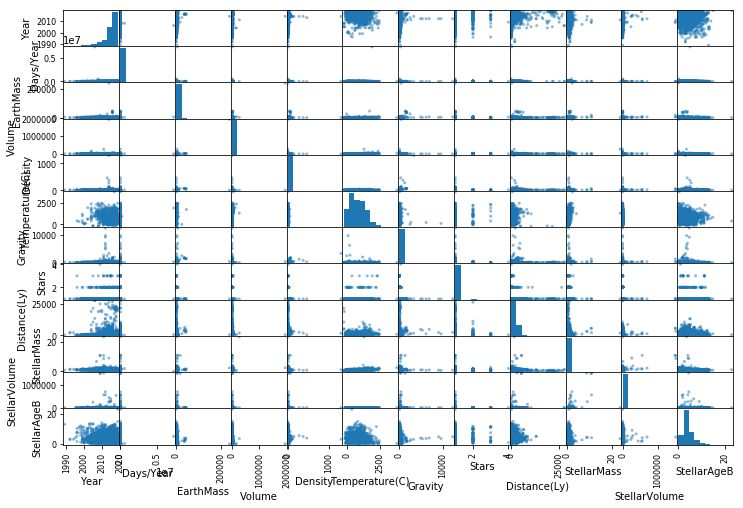

In [14]:
pd.plotting.scatter_matrix(df, figsize=(12,8))


In [15]:
df.corr()

,Year,Days/Year,EarthMass,Volume,Density,Temperature(C),Gravity,Stars,Distance(Ly),StellarMass,StellarVolume,StellarAgeB
Year,1.000000,-0.039641,-0.048275,-0.069160,0.002977,-0.120093,-0.058451,-0.069107,0.136207,-0.113895,-0.042082,-0.051896
Days/Year,-0.039641,1.000000,0.032662,0.013862,0.005778,0.066305,0.010661,-0.002526,-0.016708,-0.023905,0.000881,0.001962
EarthMass,-0.048275,0.032662,1.000000,0.869773,0.060860,0.168223,0.172281,0.010428,-0.005232,0.106688,0.143126,-0.063114
Volume,-0.069160,0.013862,0.869773,1.000000,-0.008040,0.505144,0.018761,0.018163,-0.025929,0.152736,0.032671,-0.047265
Density,0.002977,0.005778,0.060860,-0.008040,1.000000,-0.108807,0.615190,-0.005604,-0.007331,0.014805,0.033481,-0.018405
Temperature(C),-0.120093,0.066305,0.168223,0.505144,-0.108807,1.000000,-0.041442,0.088758,0.128871,0.298408,0.151790,-0.118096
Gravity,-0.058451,0.010661,0.172281,0.018761,0.615190,-0.041442,1.000000,-0.002680,0.007911,0.031809,0.052613,-0.030412
Stars,-0.069107,-0.002526,0.010428,0.018163,-0.005604,0.088758,-0.002680,1.000000,-0.068712,-0.013879,-0.008782,0.050723
Distance(Ly),0.136207,-0.016708,-0.005232,-0.025929,-0.007331,0.128871,0.007911,-0.068712,1.000000,-0.043685,0.031860,-0.079334
StellarMass,-0.113895,-0.023905,0.106688,0.152736,0.014805,0.298408,0.031809,-0.013879,-0.043685,1.000000,0.482730,-0.099730


In [16]:
#correleations: 
#Volume and Temperature: 0.5: more surface area to capture sun energy ? thicker atmospheres ?
#Temperature and  Stellar Mass: 0.29 :> stellar mass > energy => higher temps

In [17]:
np.std(df['Volume'])

31571.73135332253

In [18]:
#fRemove Outliers: keep data that is under 3 standard deviations:
df_new = df[(df['Volume']<np.std(df['Volume'])*3)&(df['Temperature(C)']<np.std(df['Temperature(C)'])*3)]


Text(0.5, 1.0, 'Temperature x Volume')

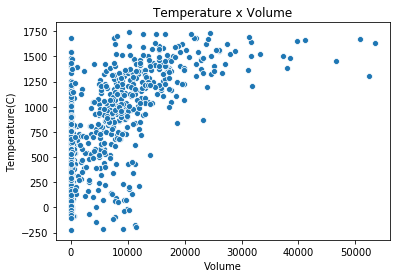

In [19]:
sns.scatterplot(x=df_new['Volume'],y=df_new['Temperature(C)']).set_title('Temperature x Volume')

In [20]:
#looks like there is a non linear relationship beetween the volume and the temperature of the planet

In [21]:
#lets take a look at the number of planets found historically

In [22]:
df_bar = df.pivot_table(index='Year', values=('Planet'), aggfunc=({'Planet':len}))

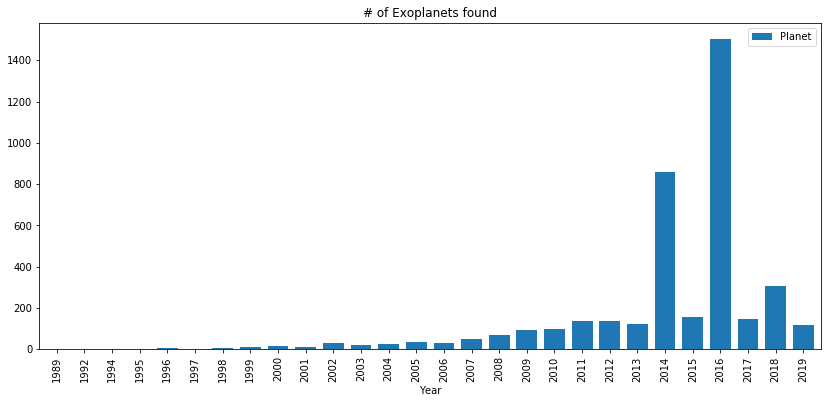

In [23]:
df_bar.plot.bar(figsize=(14,6),width=.75,title='# of Exoplanets found')

In [ ]:
#We can see that the number of exoplanets found per year has grown exponentially thanks to new tools and satelites.

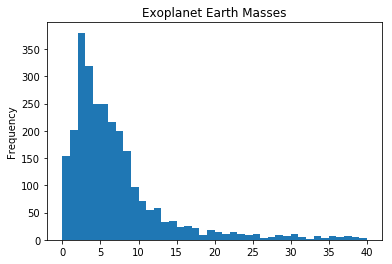

In [24]:
df['EarthMass'].plot.hist(bins = 40, range=(0,40), title='Exoplanet Earth Masses')

In [25]:
df['EarthMass'].median()

8.1

In [26]:
df['EarthMass'].mean()

478.8623848281056

In [27]:
#Our planet lies on the smaller side of the distribution of exoplanets.
#since the distribution of our data is extremely right skewed, our mean is biased at 478. 
#therefore we use the median method as a measure of central tendency: 8. 

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 864x576 with 0 Axes>

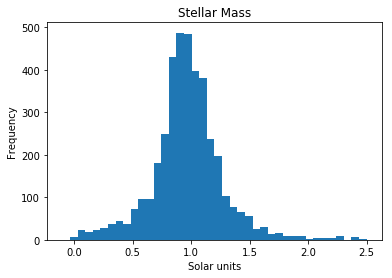

<Figure size 864x576 with 0 Axes>

In [28]:
#plt.hist(df['StellarAgeB'])
plt.hist(df['StellarMass'], bins=40, range=(-0.1,2.5))
plt.title('Stellar Mass')
plt.xlabel('Solar units')
plt.ylabel('Frequency')
plt.figure(figsize=(12,8))

In [29]:
#Looks like stellar mass is bell shaped similar to a normal distribution
#The average stellar mass is around 1, meaning that on average exoplanets inhabitate stars much like our own. 
#in other words, our sun is very average.

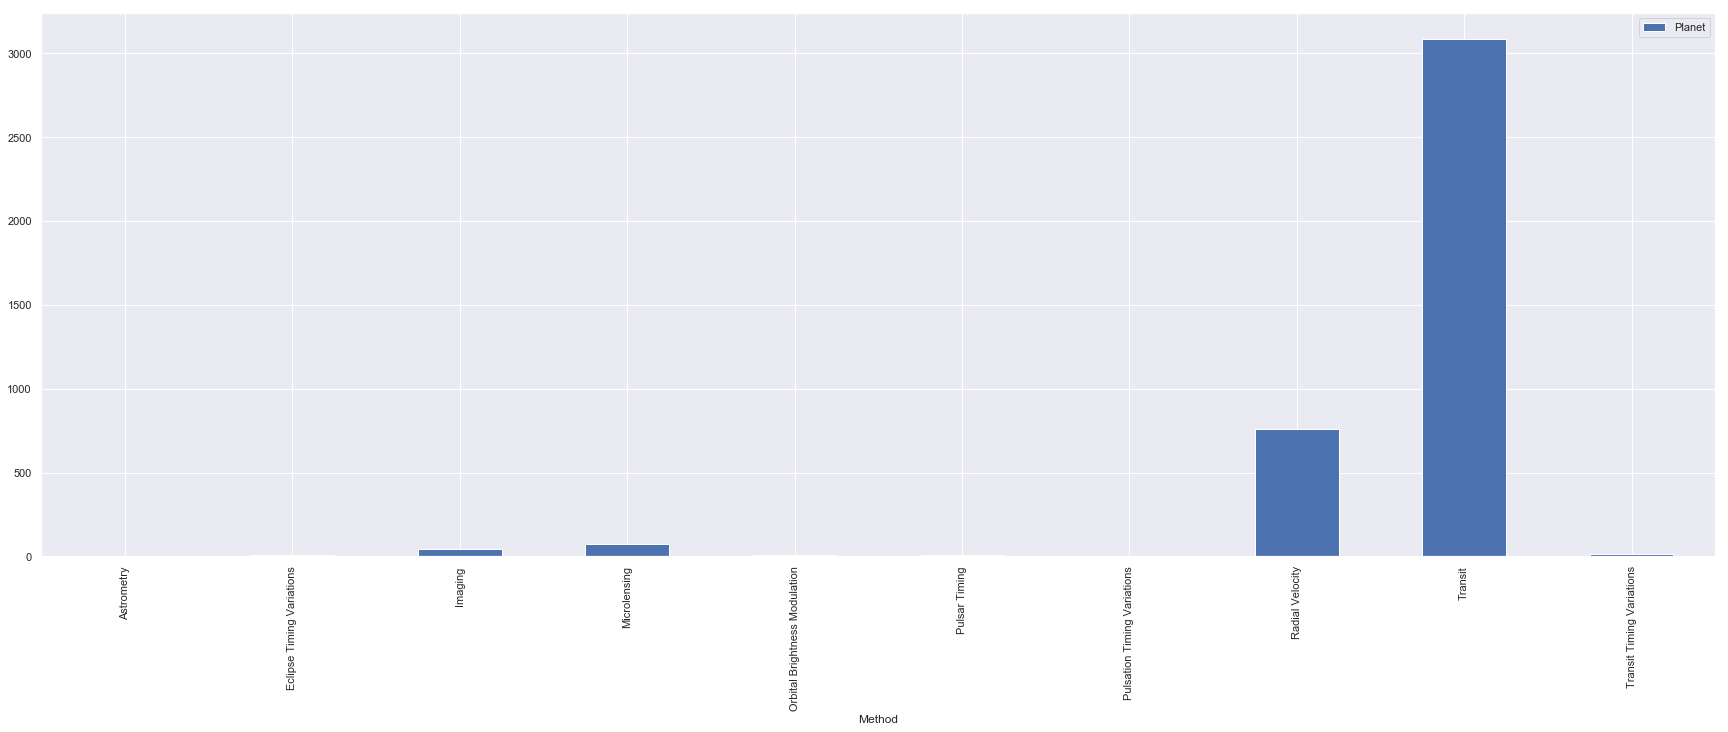

In [43]:
df_method = df[['Planet','Method']].groupby(['Method']).agg(len)
df_method.plot.bar()

In [ ]:
#By far, the most used method of detecting exoplnets has been by the Transit method.

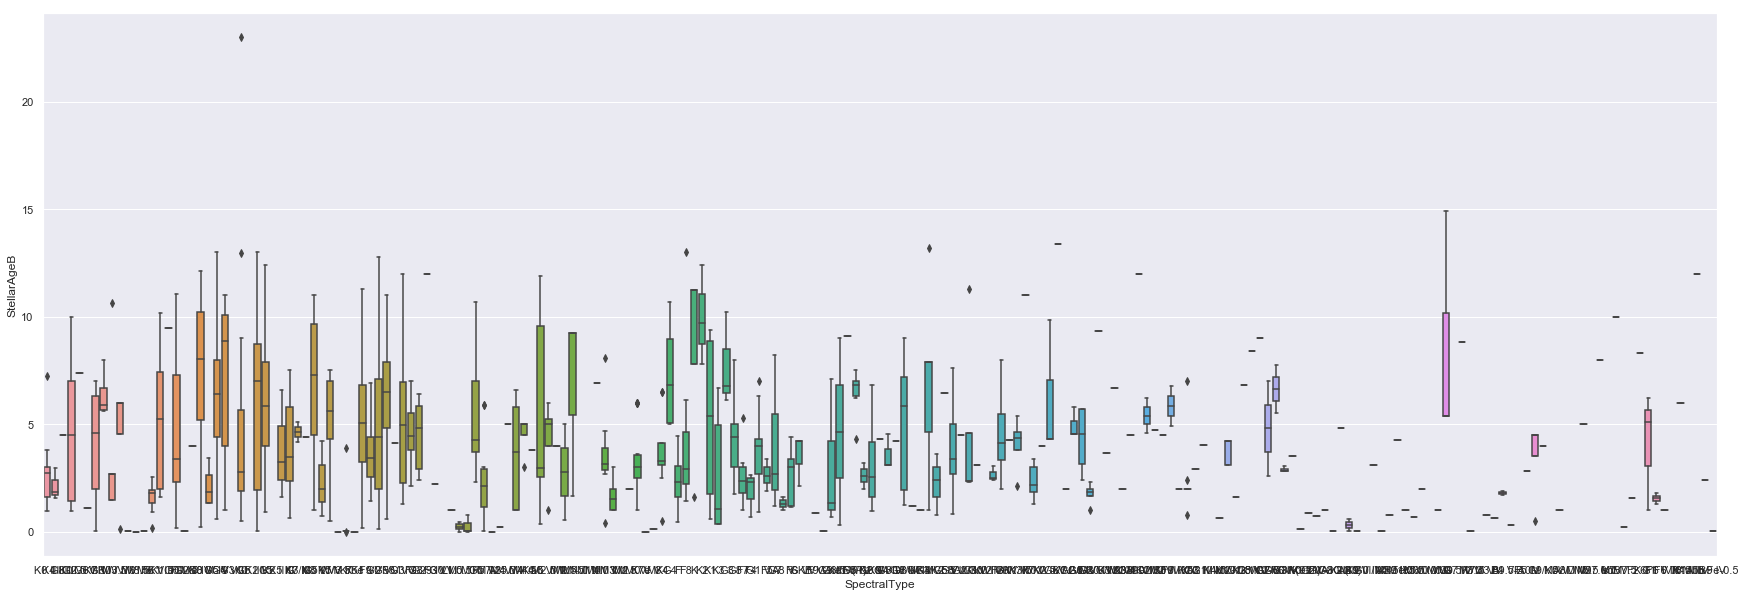

In [30]:
sns.set(rc={'figure.figsize':(30,10)})
sns.boxplot(x=df['SpectralType'],y=df['StellarAgeB'])
